In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [128]:
path = 'data/RI/'

features_df = pd.read_csv(path + 'RI_features.csv', header=None).rename(columns={0: 'GEOID', 1: 'population', 2: 'neighboors'})
distances_df = pd.read_csv(path + 'RI_distances.csv').drop(columns=['Node_ID'])

distances_df.columns = distances_df.index

In [132]:
pop_dict = features_df['population'].to_dict()
geoid_dict = features_df['GEOID'].to_dict()
neighboors_dict = features_df['neighboors'].to_dict()

In [133]:
full_graph = nx.from_pandas_adjacency(distances_df)
nx.set_node_attributes(full_graph, pop_dict, 'population')
nx.set_node_attributes(full_graph, geoid_dict, 'geoid')

In [147]:
G = nx.Graph()

for node, edges in full_graph.adjacency():
    G.add_node(node, **full_graph.nodes[node])
    neighbor_geoids = neighboors_dict.get(node, []).split(',')
    
    # Iterate over the edges
    for neighbor, attributes in edges.items():
        if str(geoid_dict.get(neighbor)) in neighbor_geoids:
            G.add_edge(node, neighbor, **attributes)

In [148]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 2}), (0, 6, {'weight': 2}), (0, 30, {'weight': 2}), (0, 59, {'weight': 2}), (0, 83, {'weight': 2}), (1, 2, {'weight': 4}), (1, 27, {'weight': 3}), (1, 30, {'weight': 2}), (1, 32, {'weight': 2}), (1, 49, {'weight': 4}), (1, 59, {'weight': 3}), (1, 211, {'weight': 3}), (6, 2, {'weight': 2}), (6, 30, {'weight': 1}), (6, 85, {'weight': 1}), (30, 2, {'weight': 2}), (59, 49, {'weight': 3}), (59, 60, {'weight': 3}), (59, 61, {'weight': 2}), (59, 83, {'weight': 2}), (59, 138, {'weight': 3}), (83, 84, {'weight': 1}), (83, 85, {'weight': 3}), (83, 138, {'weight': 3}), (2, 7, {'weight': 2}), (2, 19, {'weight': 4}), (2, 20, {'weight': 5}), (2, 27, {'weight': 3}), (2, 85, {'weight': 3}), (2, 89, {'weight': 2}), (2, 121, {'weight': 2}), (2, 208, {'weight': 4}), (2, 243, {'weight': 3}), (27, 7, {'weight': 2}), (27, 16, {'weight': 2}), (27, 32, {'weight': 1}), (27, 209, {'weight': 2}), (32, 16, {'weight': 2}), (32, 211, {'weight': 2}), (49, 50, {'weight': 4}), (49, 51, 

In [149]:
G.nodes(data=True)

NodeDataView({0: {'population': 4686, 'geoid': 44003021002}, 1: {'population': 4624, 'geoid': 44003021300}, 6: {'population': 2421, 'geoid': 44003021001}, 30: {'population': 3657, 'geoid': 44003021200}, 59: {'population': 6207, 'geoid': 44007010600}, 83: {'population': 3992, 'geoid': 44007013400}, 2: {'population': 5380, 'geoid': 44003021100}, 27: {'population': 4063, 'geoid': 44003021401}, 32: {'population': 3882, 'geoid': 44003021402}, 49: {'population': 4801, 'geoid': 44001030100}, 211: {'population': 3399, 'geoid': 44003021501}, 7: {'population': 0, 'geoid': 44003980000}, 19: {'population': 5588, 'geoid': 44003022100}, 20: {'population': 4300, 'geoid': 44003022300}, 85: {'population': 3068, 'geoid': 44007013600}, 89: {'population': 4757, 'geoid': 44007014200}, 121: {'population': 3166, 'geoid': 44007013900}, 208: {'population': 3152, 'geoid': 44003021901}, 243: {'population': 4950, 'geoid': 44007013800}, 3: {'population': 3845, 'geoid': 44003020904}, 5: {'population': 6876, 'geoid'

In [150]:
len(G.edges)

665

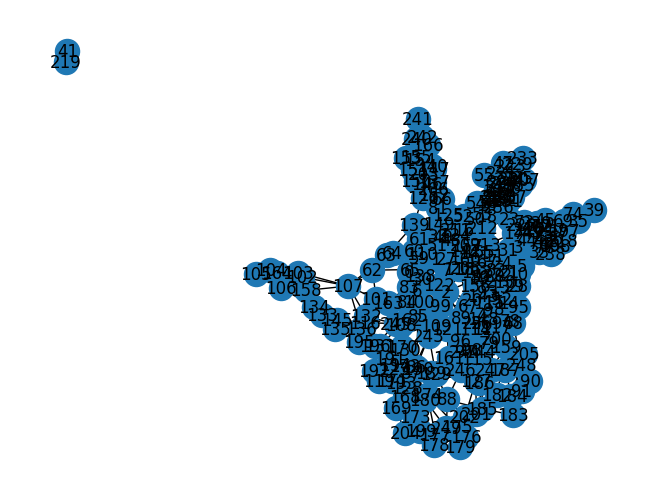

In [151]:
nx.draw(G, with_labels=True)
plt.show()